##  Scrape Channel statistics from youtube. Analyze and Visualize YouTube channel

In [1]:
from googleapiclient.discovery import build
from dotenv import load_dotenv
import os
import pandas as pd
import seaborn as sns

In [2]:
load_dotenv()

True

In [3]:
api_key=os.getenv('yt_api_key')
# channel_id="UCBqFKDipsnzvJdt6UT0lMIg"
channel_ids=['UCsBjURrPoezykLs9EqgamOA',#fireship
            'UCCezIgC97PvUuR4_gbFUs5g',#corey Schafer
            'UCeVMnSShP_Iviwkknt83cww',#code with harry
            'UCh9nVJoWXmFb7sLApWGcLPQ',# codebasics
            'UCkw4JCwteGrDHIsyIIKo4tQ' # edureka
            ]
youtube=build('youtube','v3',developerKey=api_key)

#### Function to get channel statistics

In [4]:
def get_channel_stats(youtube,channel_ids):
    all_data=[]
    request=youtube.channels().list(
    part='snippet,contentDetails,statistics',
        id=','.join(channel_ids)
    )
    response=request.execute()
    
    for i in range(len(response['items'])):
        data=dict(Channel_name=response['items'][i]['snippet']['title'],
                  Subscribers=response['items'][i]['statistics']['subscriberCount'],
                  Views=response['items'][i]['statistics']['viewCount'],
                  Total_videos=response['items'][i]['statistics']['videoCount'],
                  playlist_id=response['items'][i]['contentDetails']['relatedPlaylists']['uploads']
                 
                 
                 )
        all_data.append(data)
    
    return all_data



In [5]:
channel_statistics=get_channel_stats(youtube,channel_ids)

In [6]:
channel_data=pd.DataFrame(channel_statistics)

In [7]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,codebasics,844000,58025902,635,UUh9nVJoWXmFb7sLApWGcLPQ
1,Corey Schafer,1190000,88524008,232,UUCezIgC97PvUuR4_gbFUs5g
2,CodeWithHarry,4400000,616696865,2126,UUeVMnSShP_Iviwkknt83cww
3,Fireship,2390000,308788688,580,UUsBjURrPoezykLs9EqgamOA
4,edureka!,3840000,392394605,9931,UUkw4JCwteGrDHIsyIIKo4tQ


In [8]:
channel_data.dtypes

Channel_name    object
Subscribers     object
Views           object
Total_videos    object
playlist_id     object
dtype: object

In [9]:
channel_data['Subscribers']=pd.to_numeric(channel_data['Subscribers'])
channel_data['Views']=pd.to_numeric(channel_data['Views'])
channel_data['Total_videos']=pd.to_numeric(channel_data['Total_videos'])

In [10]:
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
playlist_id     object
dtype: object

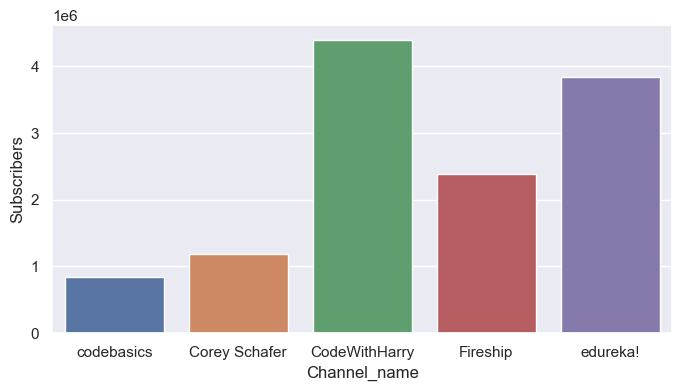

In [11]:
sns.set(rc={'figure.figsize':(8,4)})
ax=sns.barplot(x='Channel_name',y='Subscribers',data=channel_data)

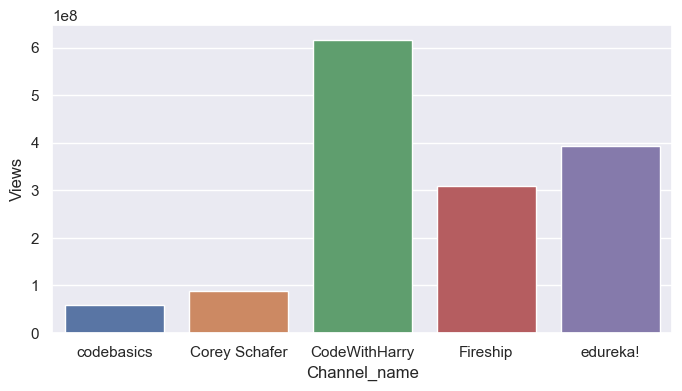

In [12]:
ax=sns.barplot(x='Channel_name',y='Views',data=channel_data)

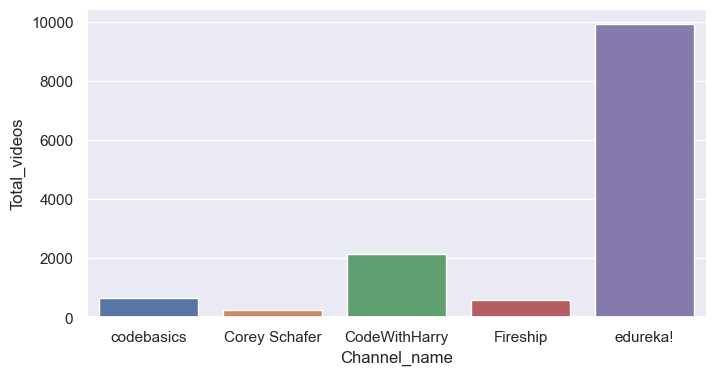

In [13]:

ax=sns.barplot(x='Channel_name',y='Total_videos',data=channel_data)

##  Scrape Video details for a youtube channel. Analyze and Visualize video details.

#### function to get video ids

In [14]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,codebasics,844000,58025902,635,UUh9nVJoWXmFb7sLApWGcLPQ
1,Corey Schafer,1190000,88524008,232,UUCezIgC97PvUuR4_gbFUs5g
2,CodeWithHarry,4400000,616696865,2126,UUeVMnSShP_Iviwkknt83cww
3,Fireship,2390000,308788688,580,UUsBjURrPoezykLs9EqgamOA
4,edureka!,3840000,392394605,9931,UUkw4JCwteGrDHIsyIIKo4tQ


In [15]:
playlist_id=channel_data.loc[channel_data['Channel_name']=='codebasics','playlist_id'].iloc[0]

In [16]:
playlist_id

'UUh9nVJoWXmFb7sLApWGcLPQ'

In [17]:
def get_video_ids(youtube,playlist_id):
    request=youtube.playlistItems().list(
        part='contentDetails',
        playlistId=playlist_id,
        maxResults=50 #50 is the max possible value
    )
    
    response=request.execute()
    video_ids=[]
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        # using nextPageToken we can get next page results and access all the results if data<50 then the nextPageToken isnt there
    next_page_token=response.get('nextPageToken') # get() will return value of nextPagetoken IF PRESENT ELSE RETURNS NONE
    more_pages=True
    while more_pages:
        if next_page_token is None:
            more_pages=False
        else:
            request=youtube.playlistItems().list(
            part='contentDetails',
            playlistId=playlist_id,
            maxResults=50,#50 is the max possible value
            pageToken=next_page_token
                )

            response=request.execute()

            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            next_page_token=response.get('nextPageToken')    
    return video_ids

In [18]:
video_ids=get_video_ids(youtube,playlist_id)

In [19]:
video_ids

['rNJR2NhS2Ec',
 '35mZDywp3TU',
 'J5usVbAoB9c',
 '6-UByNVIHwU',
 'WPSh2xaui_s',
 'RmpuqY8_ZLw',
 'XClkezjOtJY',
 'AIzjiGlwr5I',
 'tH7lTK_CeJU',
 'tI7EZNjRHdE',
 'fXzSgmyDjWg',
 '7r5rqK7GHEY',
 'xTvdsMRiF6c',
 'jewh3qEGd0A',
 '67_aMPDk2zw',
 'p5lPAxM0VRY',
 'FtONvNGAJYk',
 '7lfc9hVQ1VM',
 'MFaJazhXrcc',
 'ANMpBit5cV4',
 'jahO4DDS2LY',
 'mpnh6XdYpFc',
 '37Aqp2BixiM',
 'bd3KtLYRpB4',
 'uSLQKYsEYMo',
 'Rm0xH2Vpfi0',
 'npgbI8KYvN8',
 'tku5zP1VzXA',
 'xP_ZON_P4Ks',
 'nAmC7SoVLd8',
 '2e5pQqBvGco',
 'SHUWIeoiEH4',
 'ZeoqOybAzdc',
 'HlBu3fsmZX0',
 'jhHnqag43WM',
 'Gw6hVMzna7g',
 'T8ryqTyVye4',
 'f-Zf5eWSW3k',
 '8n-zu2sDt1M',
 'CQZdrA-hqCo',
 '__4BIPqNDbk',
 'vBmYnaMz0kk',
 'wKqt7ThgR1g',
 'MZezGuA9dKU',
 'y9p6tWgXa20',
 'in3IB45YEgY',
 'IJCcHDLv7ss',
 'hQvCOBv_-LE',
 'LYSaxDQbf2k',
 'vL4yC-wyKu8',
 'nkvInnpuic8',
 'tT4V7zguCnc',
 '-doYCOojY4w',
 'iaeKdiBu5Hs',
 'MaaphT465_I',
 'sUTr-qs0u20',
 'eaFaD_IBYW4',
 'L7a1QBJdbzg',
 'dzTwpJ1J2rs',
 'yboN-5jHVAY',
 'b_n-hhtMbXA',
 '6erwYj4T86c',
 '0fEipH

### function to get video details

In [20]:
def get_video_details(youtube,video_ids):
    all_video_stats=[]
    for i in range(0,len(video_ids),50):
        request=youtube.videos().list(
                 part='snippet,statistics',
                 id=','.join(video_ids[i:i+50])
        )
        response=request.execute()
        for video in response['items']:
            video_stats=dict(Title=video['snippet']['title'],
                            Published_date=video['snippet']['publishedAt'],
                            Views=video['statistics']['viewCount'],
                            Likes=video['statistics']['likeCount'],
                            Comments=video['statistics']['commentCount']
                            )
            all_video_stats.append(video_stats)
    print("codebasics_total_videos",len(all_video_stats))        
    return all_video_stats  

In [21]:
get_video_details(youtube,video_ids)

codebasics_total_videos 636


[{'Title': 'Programmer or Zookeeper? 🤔🐍🐼 #dataanalysis #datascience #data #shorts',
  'Published_date': '2023-09-03T12:30:33Z',
  'Views': '12440',
  'Likes': '713',
  'Comments': '18'},
 {'Title': 'Using CHATGPT for DATA ANALYST interview! 🧠💡 #dataanalysis #datascience #data #shorts',
  'Published_date': '2023-09-02T12:55:42Z',
  'Views': '5186',
  'Likes': '640',
  'Comments': '4'},
 {'Title': 'Nurse👩\u200d⚕️ to Mom👨\u200d👩\u200d👦 to Data Analyst📊 #dataanalysis #datascience #data #shorts',
  'Published_date': '2023-09-01T12:30:17Z',
  'Views': '5474',
  'Likes': '237',
  'Comments': '4'},
 {'Title': 'Something MORE IMPORTANT than tech skills! 🤔🤯 #dataanalysis #datascience #data #shorts',
  'Published_date': '2023-08-31T12:30:03Z',
  'Views': '5743',
  'Likes': '448',
  'Comments': '3'},
 {'Title': 'Data Scientist Job-Ready Checklist: Know Where You Stand! 🚀🚀',
  'Published_date': '2023-08-30T13:30:09Z',
  'Views': '8966',
  'Likes': '435',
  'Comments': '39'},
 {'Title': '5 Ways SQL 

In [22]:
video_details=get_video_details(youtube,video_ids)

codebasics_total_videos 636


In [23]:
video_df=pd.DataFrame(video_details)

In [24]:
video_df

,Title,Published_date,Views,Likes,Comments
0,Programmer or Zookeeper? 🤔🐍🐼 #dataanalysis #da...,2023-09-03T12:30:33Z,12440,713,18
1,Using CHATGPT for DATA ANALYST interview! 🧠💡 #...,2023-09-02T12:55:42Z,5186,640,4
2,Nurse👩‍⚕️ to Mom👨‍👩‍👦 to Data Analyst📊 #dataan...,2023-09-01T12:30:17Z,5474,237,4
3,Something MORE IMPORTANT than tech skills! 🤔🤯 ...,2023-08-31T12:30:03Z,5743,448,3
4,Data Scientist Job-Ready Checklist: Know Where...,2023-08-30T13:30:09Z,8966,435,39
...,...,...,...,...,...
631,Python Tutorial - 5. Lists,2015-12-20T23:01:51Z,34393,317,55
632,Python Tutorial - 4. Strings,2015-12-20T22:34:19Z,28510,316,28
633,Python Tutorial - 3. Numbers,2015-12-20T02:54:56Z,32220,318,31
634,Python Tutorial - 2. Variables,2015-12-20T02:11:10Z,42394,333,24


In [25]:
video_df['Published_date']=pd.to_datetime(video_df['Published_date']).dt.date
video_df['Views']=pd.to_numeric(video_df['Views'])
video_df['Likes']=pd.to_numeric(video_df['Likes'])
video_df['Comments']=pd.to_numeric(video_df['Comments'])

#### top 10 videos of codebasics

In [26]:
video_df.dtypes

Title             object
Published_date    object
Views              int64
Likes              int64
Comments           int64
dtype: object

In [27]:
top10_codebasics_vids=video_df.sort_values(by='Views',ascending=False).head(10)

In [28]:
top10_codebasics_vids

,Title,Published_date,Views,Likes,Comments
163,"Reality behind data science, machine learning ...",2022-02-16,1223749,58123,426
312,Bitcoin mining with 15 lines of python code Py...,2021-01-03,1089936,31681,2835
564,Python Pandas Tutorial 1. What is Pandas pytho...,2017-01-21,1006048,11251,371
533,Machine Learning Tutorial Python -1: What is M...,2018-06-30,894267,10211,215
383,Complete python roadmap | How to become an exp...,2020-09-13,858549,30002,1034
532,Machine Learning Tutorial Python - 2: Linear R...,2018-07-01,826304,11020,1199
563,Python Pandas Tutorial 2: Dataframe Basics,2017-01-28,697549,10626,440
369,Simple explanation of convolutional neural net...,2020-10-14,692303,15628,638
468,Data Structures & Algorithms Tutorial in Pytho...,2020-03-07,651164,10896,245
240,He cracked FAANG (MAANG) interviews in 10 comp...,2021-06-19,641718,13893,636


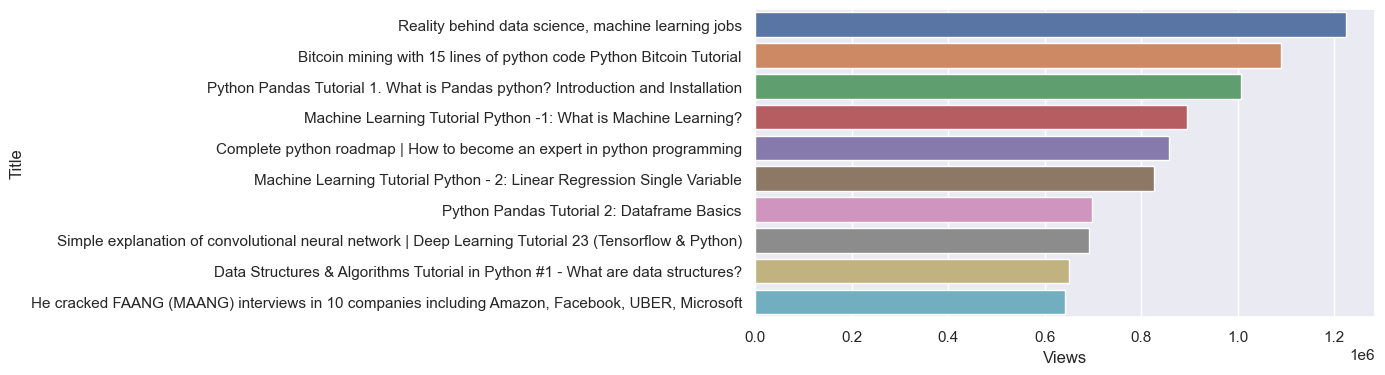

In [29]:
ax1=sns.barplot(x='Views',y='Title',data=top10_codebasics_vids)

In [30]:
video_df['Month']=pd.to_datetime(video_df['Published_date']).dt.strftime('%b')

In [31]:
video_df

,Title,Published_date,Views,Likes,Comments,Month
0,Programmer or Zookeeper? 🤔🐍🐼 #dataanalysis #da...,2023-09-03,12440,713,18,Sep
1,Using CHATGPT for DATA ANALYST interview! 🧠💡 #...,2023-09-02,5186,640,4,Sep
2,Nurse👩‍⚕️ to Mom👨‍👩‍👦 to Data Analyst📊 #dataan...,2023-09-01,5474,237,4,Sep
3,Something MORE IMPORTANT than tech skills! 🤔🤯 ...,2023-08-31,5743,448,3,Aug
4,Data Scientist Job-Ready Checklist: Know Where...,2023-08-30,8966,435,39,Aug
...,...,...,...,...,...,...
631,Python Tutorial - 5. Lists,2015-12-20,34393,317,55,Dec
632,Python Tutorial - 4. Strings,2015-12-20,28510,316,28,Dec
633,Python Tutorial - 3. Numbers,2015-12-20,32220,318,31,Dec
634,Python Tutorial - 2. Variables,2015-12-20,42394,333,24,Dec


In [32]:
videos_per_month=video_df.groupby('Month',as_index=False).size()

In [33]:
videos_per_month

,Month,size
0,Apr,41
1,Aug,72
2,Dec,62
3,Feb,44
4,Jan,53
5,Jul,52
6,Jun,53
7,Mar,42
8,May,80
9,Nov,48


In [34]:
custom_month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


In [35]:
videos_per_month.index=pd.CategoricalIndex(videos_per_month['Month'],categories=custom_month_order,ordered=True)

In [36]:
videos_per_month.sort_index()

,Month,size
Month,,
Jan,Jan,53
Feb,Feb,44
Mar,Mar,42
Apr,Apr,41
May,May,80
Jun,Jun,53
Jul,Jul,52
Aug,Aug,72
Sep,Sep,56


### videos uploaded by codebasics every month on avg

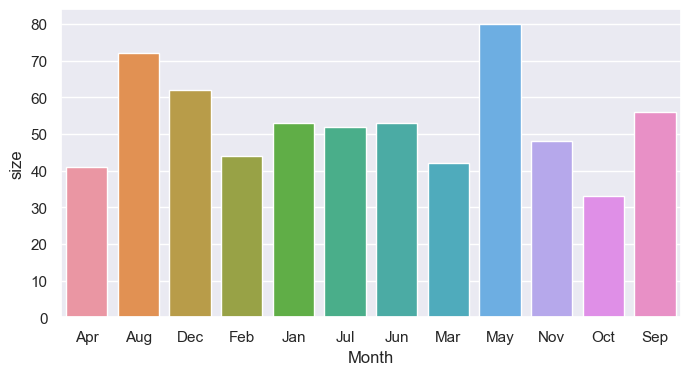

In [37]:
ax2=sns.barplot(x='Month',y='size',data=videos_per_month)

#### storing video data dataframe as csv

In [38]:
video_df.to_csv('Video_details(Codebasics).csv')